In [2]:
import cv2 
import numpy as np 
from ImageMorphism import ImageMorpher
import matplotlib.pyplot as plt 


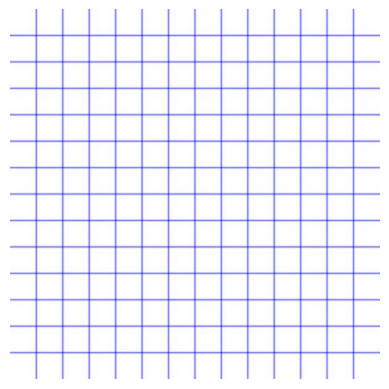

In [3]:
src_img = cv2.imread('Image/GRID.jpeg')
plt.imshow(src_img)
plt.axis('off')
plt.show()

In [4]:
def plot_images_with_multiple_lines(image1 , image2,   image2_lines , title1 = 'image1' , title2 = 'image2' ):
    

    image1_array = image1.copy()
    image2_array = image2.copy()
    # Plot multiple directed lines on the second image
    for i in range (0 , len(image2_lines) - 1  , 2 ) :
        start_point, end_point = np.flip(image2_lines[i]) , np.flip(image2_lines[i+1])
        font = cv2.FONT_HERSHEY_SIMPLEX

        # Define the font parameters
        font_scale = 1
        font_thickness = 2
        font_color = (0, 0, 0)  # (B, G, R)

        # Add text to the image
       
        mid_point = ((start_point[0] + end_point[0] ) // 2 + 40, (start_point[1] + end_point[1]  ) // 2 + 50)

        if i < (len(image2_lines) / 2):
            text = chr( ord('U') + (i // 2))
            cv2.arrowedLine(image1_array, start_point, end_point, (0, 0, 0), tipLength=0.1, thickness=5)
            cv2.putText(image1_array, text, mid_point, font, font_scale, font_color, font_thickness)
        else : 
            text = chr(ord("U") + ((i - (len(image2_lines)  ) // 2) // 2)) + "'"
            cv2.putText(image2_array, text, mid_point, font, font_scale, font_color, font_thickness)
            cv2.arrowedLine(image2_array, start_point, end_point , (00, 00 , 00), tipLength=0.1 , thickness = 5)
            

    # Display the images side by side
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    # Display the first image
    axs[0].imshow(image1_array)
    axs[0].set_title(title1)
    axs[0].axis('off')

    # Display the second image with multiple directed lines
    axs[1].imshow(image2_array)
    axs[1].set_title(title2)
    axs[1].axis('off')

    plt.show()

In [ ]:
P_coordinates  =  np.array([496  , 283 ]) 
Q_coordinates  =  np.array([ 182, 283 ]) 
Qp_coordinates =  np.array([  182 , 479]) 
Qs_coordinates = np.array([80 , 479 ]) 
#each coordinate is in the form (y , x ) please be careful with the order 
lines_coordinates_src  = [P_coordinates , Q_coordinates , Q_coordinates , Qp_coordinates]
lines_coordinates_dst = [P_coordinates , Q_coordinates , Q_coordinates , Qs_coordinates ]
all_lines = lines_coordinates_src + lines_coordinates_dst
plot_images_with_multiple_lines(src_img ,src_img,  all_lines  , 'image with original feature vectors'.title() , 'image with new feature vectors'.title())



In [6]:
morphed_img = ImageMorpher.morph_on_features(src_img , lines_coordinates_src , lines_coordinates_dst ,   0.1  , 2 ,  1 )

In [ ]:
plot_images_with_multiple_lines(src_img , morphed_img ,all_lines , 'original image with fetaure vectors'.title() , 'morphed image with new feature vectors'.title() )